# Importing the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import dateutil
from dateutil.relativedelta import relativedelta
warnings.filterwarnings("ignore")

In [ ]:
df_May = pd.read_csv('May_half_ready.csv')
df_June = pd.read_csv('june_half_ready.csv')
df_July = pd.read_csv('july_half_ready.csv')
df_August = pd.read_csv('august_half_ready.csv')


In [ ]:
data = pd.concat([df_May,df_June,df_July,df_August],ignore_index=True)
data


,Unnamed: 0,date,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv,total_feed_ton/h_pv,total_feed_perc_pv,fly_ash_1_perc_pv,fly_ash_2_perc_pv,main_fan_speed_rpm_pv,grinding_pressure_bar_pv,mill_injection_water_m3/h_pv,bucket_elv_mtr_pwr_kw_pv,cement_type_cpii_bool_pv,cement_type_cpiv_bool_pv,mill_operation
0,0,2019-05-10 11:07:30.000,747.14,31.17,56.13,85.82,100.68,31.00,0.07,928.2,115.0,2.69,4.88,0.0,1.0,1.0
1,1,2019-05-10 11:12:00.000,746.87,31.37,56.83,85.50,100.53,30.60,0.09,928.2,116.0,2.69,4.83,0.0,1.0,1.0
2,2,2019-05-10 11:24:00.000,717.51,29.79,60.41,57.92,69.81,0.05,0.15,928.2,123.0,2.45,4.82,0.0,1.0,1.0
3,3,2019-05-10 11:24:30.000,735.89,30.51,55.76,57.72,69.56,0.00,0.15,928.2,120.0,2.46,4.85,0.0,1.0,1.0
4,4,2019-05-10 11:25:00.000,736.68,31.61,55.89,58.01,69.90,0.03,0.14,928.2,118.0,2.46,4.88,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172882,75150,2019-08-31 20:06:00.000,803.23,37.25,58.35,71.36,118.95,0.03,0.15,880.6,116.0,1.36,4.95,1.0,0.0,1.0
172883,75151,2019-08-31 20:06:30.000,803.17,37.28,58.62,71.74,119.48,0.01,0.10,880.6,118.0,1.36,4.96,1.0,0.0,1.0
172884,75152,2019-08-31 20:07:00.000,803.60,37.17,58.66,71.59,119.31,0.01,0.11,880.6,116.0,1.37,4.92,1.0,0.0,1.0
172885,75153,2019-08-31 20:07:30.000,803.54,37.24,59.18,71.41,119.19,0.02,0.13,880.6,122.0,1.37,4.93,1.0,0.0,1.0


In [ ]:
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head()

,date,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv,total_feed_ton/h_pv,total_feed_perc_pv,fly_ash_1_perc_pv,fly_ash_2_perc_pv,main_fan_speed_rpm_pv,grinding_pressure_bar_pv,mill_injection_water_m3/h_pv,bucket_elv_mtr_pwr_kw_pv,cement_type_cpii_bool_pv,cement_type_cpiv_bool_pv,mill_operation
0,2019-05-10 11:07:30.000,747.14,31.17,56.13,85.82,100.68,31.00,0.07,928.2,115.0,2.69,4.88,0.0,1.0,1.0
1,2019-05-10 11:12:00.000,746.87,31.37,56.83,85.50,100.53,30.60,0.09,928.2,116.0,2.69,4.83,0.0,1.0,1.0
2,2019-05-10 11:24:00.000,717.51,29.79,60.41,57.92,69.81,0.05,0.15,928.2,123.0,2.45,4.82,0.0,1.0,1.0
3,2019-05-10 11:24:30.000,735.89,30.51,55.76,57.72,69.56,0.00,0.15,928.2,120.0,2.46,4.85,0.0,1.0,1.0
4,2019-05-10 11:25:00.000,736.68,31.61,55.89,58.01,69.90,0.03,0.14,928.2,118.0,2.46,4.88,0.0,1.0,1.0


In [ ]:
data.shape

(172887, 15)

In [ ]:
#keeping only where mill operates
data = data.drop(data[data['mill_operation'] != 1].index )
data['mill_operation'].value_counts()

1.0    172650
Name: mill_operation, dtype: int64

In [ ]:
#keeping only cement type 0 or 1
data = data.drop(data[data['cement_type_cpii_bool_pv'] == 0.5].index )
data = data.drop(data[data['cement_type_cpiv_bool_pv'] == 0.5].index )
data.shape


(172649, 15)

In [ ]:
data['date'] = pd.to_datetime(data['date'], errors='coerce', dayfirst=True)
data = data.sort_values(by = 'date')
data.set_index('date', inplace=True)
data

,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv,total_feed_ton/h_pv,total_feed_perc_pv,fly_ash_1_perc_pv,fly_ash_2_perc_pv,main_fan_speed_rpm_pv,grinding_pressure_bar_pv,mill_injection_water_m3/h_pv,bucket_elv_mtr_pwr_kw_pv,cement_type_cpii_bool_pv,cement_type_cpiv_bool_pv,mill_operation
date,,,,,,,,,,,,,,
2019-05-10 11:07:30,747.14,31.17,56.13,85.82,100.68,31.00,0.07,928.2,115.0,2.69,4.88,0.0,1.0,1.0
2019-05-10 11:12:00,746.87,31.37,56.83,85.50,100.53,30.60,0.09,928.2,116.0,2.69,4.83,0.0,1.0,1.0
2019-05-10 11:24:00,717.51,29.79,60.41,57.92,69.81,0.05,0.15,928.2,123.0,2.45,4.82,0.0,1.0,1.0
2019-05-10 11:24:30,735.89,30.51,55.76,57.72,69.56,0.00,0.15,928.2,120.0,2.46,4.85,0.0,1.0,1.0
2019-05-10 11:25:00,736.68,31.61,55.89,58.01,69.90,0.03,0.14,928.2,118.0,2.46,4.88,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31 20:06:00,803.23,37.25,58.35,71.36,118.95,0.03,0.15,880.6,116.0,1.36,4.95,1.0,0.0,1.0
2019-08-31 20:06:30,803.17,37.28,58.62,71.74,119.48,0.01,0.10,880.6,118.0,1.36,4.96,1.0,0.0,1.0
2019-08-31 20:07:00,803.60,37.17,58.66,71.59,119.31,0.01,0.11,880.6,116.0,1.37,4.92,1.0,0.0,1.0


In [ ]:
data.dtypes

separator_speed_rpm_pv          float64
mill_dp_mbar_pv                 float64
separator_pwr_kw_pv             float64
total_feed_ton/h_pv             float64
total_feed_perc_pv              float64
fly_ash_1_perc_pv               float64
fly_ash_2_perc_pv               float64
main_fan_speed_rpm_pv           float64
grinding_pressure_bar_pv        float64
mill_injection_water_m3/h_pv    float64
bucket_elv_mtr_pwr_kw_pv        float64
cement_type_cpii_bool_pv        float64
cement_type_cpiv_bool_pv        float64
mill_operation                  float64
dtype: object

# Dealing with the Missing Values

In [ ]:
data.shape

(172649, 14)

In [ ]:
data.isna().sum()

separator_speed_rpm_pv              1
mill_dp_mbar_pv                     4
separator_pwr_kw_pv                 5
total_feed_ton/h_pv             39287
total_feed_perc_pv                 66
fly_ash_1_perc_pv                   8
fly_ash_2_perc_pv                   5
main_fan_speed_rpm_pv           39311
grinding_pressure_bar_pv            4
mill_injection_water_m3/h_pv    39290
bucket_elv_mtr_pwr_kw_pv            4
cement_type_cpii_bool_pv            5
cement_type_cpiv_bool_pv            3
mill_operation                      0
dtype: int64

In [ ]:
#for cement types drop NaNs
data = data.drop(data[pd.isnull(data['cement_type_cpii_bool_pv']) ].index )
data = data.drop(data[pd.isnull(data['cement_type_cpiv_bool_pv']) ].index )
data.shape

(172642, 14)

In [ ]:
data.describe()

,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv,total_feed_ton/h_pv,total_feed_perc_pv,fly_ash_1_perc_pv,fly_ash_2_perc_pv,main_fan_speed_rpm_pv,grinding_pressure_bar_pv,mill_injection_water_m3/h_pv,bucket_elv_mtr_pwr_kw_pv,cement_type_cpii_bool_pv,cement_type_cpiv_bool_pv,mill_operation
count,172641.000000,172638.000000,172637.000000,133355.000000,172576.000000,172634.000000,172637.000000,133331.000000,172638.000000,133352.000000,172638.00000,172642.000000,172642.000000,172642.0
mean,751.725984,34.864150,57.712099,70.596705,99.479719,7.163881,6.702031,918.901134,117.478887,2.087891,4.85152,0.348235,0.651765,1.0
std,49.360289,3.033680,2.290658,14.347293,14.273899,12.559481,13.035688,62.834377,6.072539,0.756017,0.25380,0.476412,0.476412,0.0
min,0.000000,1.110000,0.000000,0.000000,0.000000,0.000000,0.000000,101.070000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0
25%,733.620000,32.890000,56.620000,60.420000,95.330000,0.010000,0.090000,868.170000,116.500000,1.630000,4.76000,0.000000,0.000000,1.0
50%,752.840000,34.575833,57.470000,70.530000,100.990000,0.030000,0.120000,940.100000,118.000000,2.440000,4.85000,0.000000,1.000000,1.0
75%,777.080000,36.510000,58.490000,83.120000,104.390000,0.165000,0.190000,953.080000,120.000000,2.680000,4.93000,1.000000,1.000000,1.0
max,1690.000000,65.820000,162.000000,102.410000,169.960000,71.940000,100.000000,1190.000000,126.000000,2.920000,10.36000,1.000000,1.000000,1.0


# Keeping Normal Operating Conditions

In [ ]:
#fly ash outliers and mill fresh feed
data = data.drop(data[data['fly_ash_1_perc_pv'] > 0.2].index)
data.shape

(129538, 14)

In [ ]:
data = data.drop(data[data['fly_ash_2_perc_pv'] > 0.2].index)
data.shape

(89527, 14)

In [ ]:
data = data.drop(data[data['total_feed_perc_pv'] <= 65].index)
data.shape

(88386, 14)

In [ ]:
data = data.drop(data[data['separator_pwr_kw_pv'] < 50].index)
data.shape

(88383, 14)

In [ ]:
data.describe()

,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv,total_feed_ton/h_pv,total_feed_perc_pv,fly_ash_1_perc_pv,fly_ash_2_perc_pv,main_fan_speed_rpm_pv,grinding_pressure_bar_pv,mill_injection_water_m3/h_pv,bucket_elv_mtr_pwr_kw_pv,cement_type_cpii_bool_pv,cement_type_cpiv_bool_pv,mill_operation
count,88382.000000,88379.000000,88380.000000,76131.000000,88342.000000,88376.000000,88380.000000,76107.000000,88381.000000,76125.000000,88381.00000,88383.000000,88383.000000,88383.0
mean,763.186157,35.504713,58.071388,62.686979,99.776242,0.025266,0.118459,931.663823,117.337723,1.816331,4.85046,0.629442,0.370558,1.0
std,55.822641,3.305912,2.483365,7.714507,12.946203,0.022559,0.038125,58.110891,6.222967,0.782940,0.18301,0.482957,0.482957,0.0
min,168.310000,1.110000,53.290000,8.860000,65.020000,0.000000,0.000000,103.632000,36.000000,0.000000,0.00000,0.000000,0.000000,1.0
25%,750.100000,33.410000,56.840000,57.270000,93.670000,0.010000,0.095000,900.710000,116.000000,1.340000,4.76000,0.000000,0.000000,1.0
50%,768.950000,35.230000,57.840000,62.430000,101.840000,0.020000,0.120000,940.100000,118.000000,1.930000,4.84000,1.000000,0.000000,1.0
75%,787.330000,37.310000,58.970000,69.320000,106.160000,0.040000,0.140000,963.900000,120.000000,2.560000,4.92500,1.000000,1.000000,1.0
max,1270.590000,65.820000,162.000000,94.340000,169.960000,0.200000,0.200000,1190.000000,125.000000,2.890000,9.37000,1.000000,1.000000,1.0


#Missing Values

In [ ]:
data.isna().sum()

separator_speed_rpm_pv              1
mill_dp_mbar_pv                     4
separator_pwr_kw_pv                 3
total_feed_ton/h_pv             12252
total_feed_perc_pv                 41
fly_ash_1_perc_pv                   7
fly_ash_2_perc_pv                   3
main_fan_speed_rpm_pv           12276
grinding_pressure_bar_pv            2
mill_injection_water_m3/h_pv    12258
bucket_elv_mtr_pwr_kw_pv            2
cement_type_cpii_bool_pv            0
cement_type_cpiv_bool_pv            0
mill_operation                      0
dtype: int64



> First Approach: Drop + Interpolation



In [ ]:
data = data.dropna(axis=0)
data.shape

(76040, 14)

In [ ]:
data = data.interpolate(axis = 1)
data.isna().sum()

separator_speed_rpm_pv          0
mill_dp_mbar_pv                 0
separator_pwr_kw_pv             0
total_feed_ton/h_pv             0
total_feed_perc_pv              0
fly_ash_1_perc_pv               0
fly_ash_2_perc_pv               0
main_fan_speed_rpm_pv           0
grinding_pressure_bar_pv        0
mill_injection_water_m3/h_pv    0
bucket_elv_mtr_pwr_kw_pv        0
cement_type_cpii_bool_pv        0
cement_type_cpiv_bool_pv        0
mill_operation                  0
dtype: int64

In [ ]:
data.describe()

,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv,total_feed_ton/h_pv,total_feed_perc_pv,fly_ash_1_perc_pv,fly_ash_2_perc_pv,main_fan_speed_rpm_pv,grinding_pressure_bar_pv,mill_injection_water_m3/h_pv,bucket_elv_mtr_pwr_kw_pv,cement_type_cpii_bool_pv,cement_type_cpiv_bool_pv,mill_operation
count,76040.000000,76040.000000,76040.000000,76040.000000,76040.000000,76040.000000,76040.000000,76040.000000,76040.000000,76040.000000,76040.000000,76040.000000,76040.000000,76040.0
mean,764.075705,35.533346,58.053140,62.690594,99.720587,0.026353,0.119296,931.643350,117.282365,1.816285,4.844286,0.599829,0.400171,1.0
std,57.288707,3.280412,2.508053,7.715236,12.944742,0.022950,0.038318,58.124503,6.231024,0.782928,0.179470,0.489936,0.489936,0.0
min,342.940000,1.110000,53.380000,8.860000,65.020000,0.000000,0.000000,103.632000,36.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,750.410000,33.470000,56.850000,57.270000,93.432500,0.010000,0.100000,900.627500,116.000000,1.340000,4.750000,0.000000,0.000000,1.0
50%,769.060000,35.300000,57.815000,62.430000,101.750000,0.020000,0.120000,940.100000,118.000000,1.920000,4.830000,1.000000,0.000000,1.0
75%,787.606250,37.330000,58.915000,69.330000,106.170000,0.040000,0.145000,963.900000,120.000000,2.560000,4.920000,1.000000,1.000000,1.0
max,1270.590000,65.820000,162.000000,94.340000,147.840000,0.200000,0.200000,1190.000000,125.000000,2.890000,8.980000,1.000000,1.000000,1.0


# Time Gaps

In [ ]:
data['diff'] = data.index.to_series().diff()
data[['diff']].head()
data[['diff']].sort_values(by=['diff'],ascending=False).head(100)


,diff
date,
2019-08-01 07:00:30,23 days 19:18:30
2019-06-21 08:50:30,3 days 04:43:30
2019-07-08 09:30:00,2 days 10:43:30
2019-06-03 06:07:30,2 days 09:05:00
2019-06-10 11:21:30,2 days 02:39:30
...,...
2019-08-27 12:18:30,0 days 03:15:30
2019-05-19 08:31:30,0 days 03:14:00
2019-08-06 10:30:00,0 days 03:13:30


In [ ]:
data[['diff']].sort_values(by=['diff'],ascending=False)
data[['diff']].describe()

,diff
count,76039
mean,0 days 00:02:08.811136390
std,0 days 02:09:14.595653018
min,0 days 00:00:29.043000
25%,0 days 00:00:30
50%,0 days 00:00:30
75%,0 days 00:00:30
max,23 days 19:18:30


Text(0, 0.5, 'number of days missing')

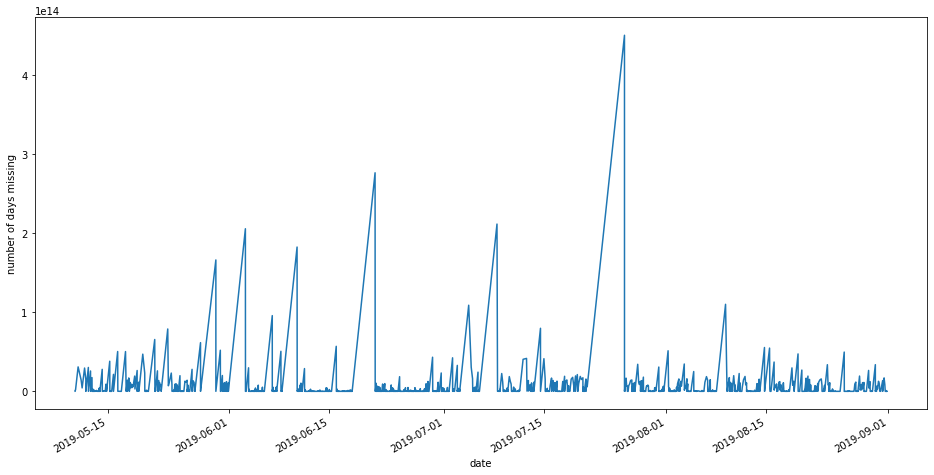

In [ ]:
plt.figure(figsize=(16,8))
data[data['diff'] > '0 days 00:00:56.740055954' ]['diff'].plot()
plt.ylabel('number of days missing')

In [ ]:
data.head()

,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv,total_feed_ton/h_pv,total_feed_perc_pv,fly_ash_1_perc_pv,fly_ash_2_perc_pv,main_fan_speed_rpm_pv,grinding_pressure_bar_pv,mill_injection_water_m3/h_pv,bucket_elv_mtr_pwr_kw_pv,cement_type_cpii_bool_pv,cement_type_cpiv_bool_pv,mill_operation,diff
date,,,,,,,,,,,,,,,
2019-05-10 11:07:30,747.14,31.17,56.13,85.82,100.68,31.00,0.07,928.2,115.0,2.69,4.88,0.0,1.0,1.0,NaT
2019-05-10 11:12:00,746.87,31.37,56.83,85.50,100.53,30.60,0.09,928.2,116.0,2.69,4.83,0.0,1.0,1.0,0 days 00:04:30
2019-05-10 11:24:00,717.51,29.79,60.41,57.92,69.81,0.05,0.15,928.2,123.0,2.45,4.82,0.0,1.0,1.0,0 days 00:12:00
2019-05-10 11:24:30,735.89,30.51,55.76,57.72,69.56,0.00,0.15,928.2,120.0,2.46,4.85,0.0,1.0,1.0,0 days 00:00:30
2019-05-10 11:25:00,736.68,31.61,55.89,58.01,69.90,0.03,0.14,928.2,118.0,2.46,4.88,0.0,1.0,1.0,0 days 00:00:30


In [ ]:
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier=(df[col] > Q1-1.5*IQR ) & (df[col] < Q3+1.5*IQR)
    return outlier

#Features-Target Time Correlations

In [ ]:
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

def get_max_shifts_per_columns(df,cols,target='',lag_limit=5):
    for col in cols_to_cor:

        datax = df[col]
        datay = df[cor_to]

        time_lag_cor = [crosscorr(datax,datay, lag=i) for i in range(lag_limit)]
        plt.plot(time_lag_cor)
        max_cor_index = time_lag_cor.index(max(time_lag_cor))   # -1 as we start from 0 index
        
        max_corr_per_column_shift_value.append(max_cor_index)
    return max_corr_per_column_shift_value
    print(max_corr_per_column_shift_value) 


> Block 1


In [ ]:
df = data[['separator_speed_rpm_pv','mill_dp_mbar_pv','separator_pwr_kw_pv']]

cols_to_cor=['separator_speed_rpm_pv','mill_dp_mbar_pv']
cor_to = 'separator_pwr_kw_pv'

max_corr_per_column_shift_value = []
lag_limit = 20  # 20 shifts  //  if each shift is e.g 30s we check as far back as 600s

 # εννοιoλογικα εχει απειρο νοημα γιατι το fan ειναι αμεσα συνδεδεμενο με το pwr ,ενω η πιεση δεχεται χρονοκαθυστερησης

shifts_block1 = get_max_shifts_per_columns(df,cols_to_cor,cor_to,20)
print(shifts_block1)



>  Block 2



In [ ]:
df = data[['separator_speed_rpm_pv','total_feed_perc_pv','fly_ash_1_perc_pv','fly_ash_2_perc_pv',	'main_fan_speed_rpm_pv'	,'grinding_pressure_bar_pv'	,'mill_injection_water_m3/h_pv','bucket_elv_mtr_pwr_kw_pv','mill_dp_mbar_pv']]

cols_to_cor=  ['separator_speed_rpm_pv','total_feed_perc_pv','fly_ash_1_perc_pv','fly_ash_2_perc_pv',	'main_fan_speed_rpm_pv'	,'grinding_pressure_bar_pv'	,'mill_injection_water_m3/h_pv','bucket_elv_mtr_pwr_kw_pv']
cor_to = 'mill_dp_mbar_pv'

shifts_block2 = get_max_shifts_per_columns(df,cols_to_cor,cor_to,20)
print(shifts_block2)

# Visualizations for the 2 target variables

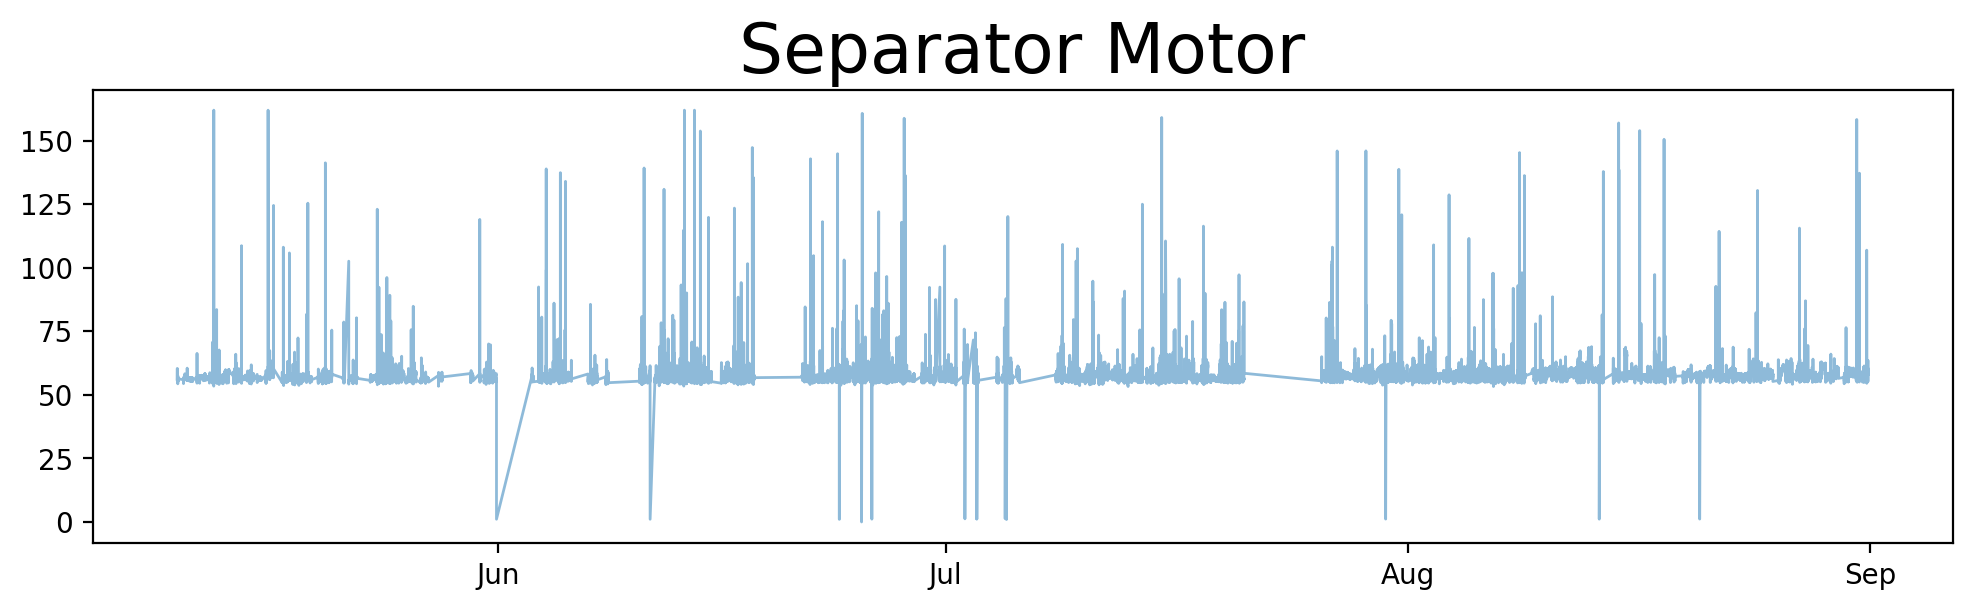

In [ ]:
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

fig, ax = plt.subplots(figsize = (12, 3), dpi=200)

#create the plot
ax.plot(data.index, data['separator_pwr_kw_pv'], lw = 1, alpha = 0.5,)

#custumize plots
ax.set_title("Separator Motor", size = 25)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
# Format x-tick labels as the full year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

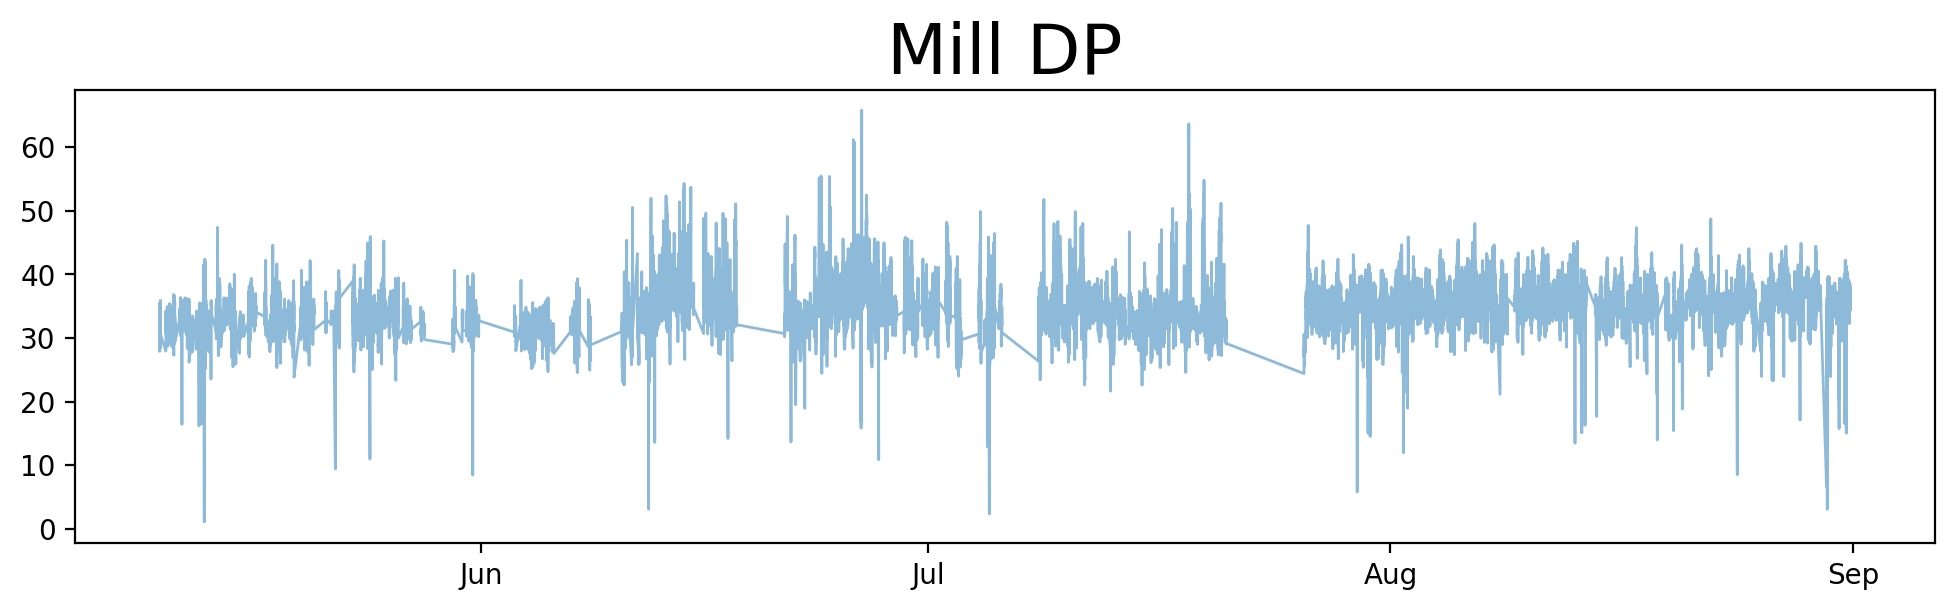

In [ ]:
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

fig, ax = plt.subplots(figsize = (12, 3), dpi=200)

#create the plot
ax.plot(data.index, data['mill_dp_mbar_pv'], lw = 1, alpha = 0.5)

#custumize plots
ax.set_title("Mill DP", size = 25)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
# Format x-tick labels as the full year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


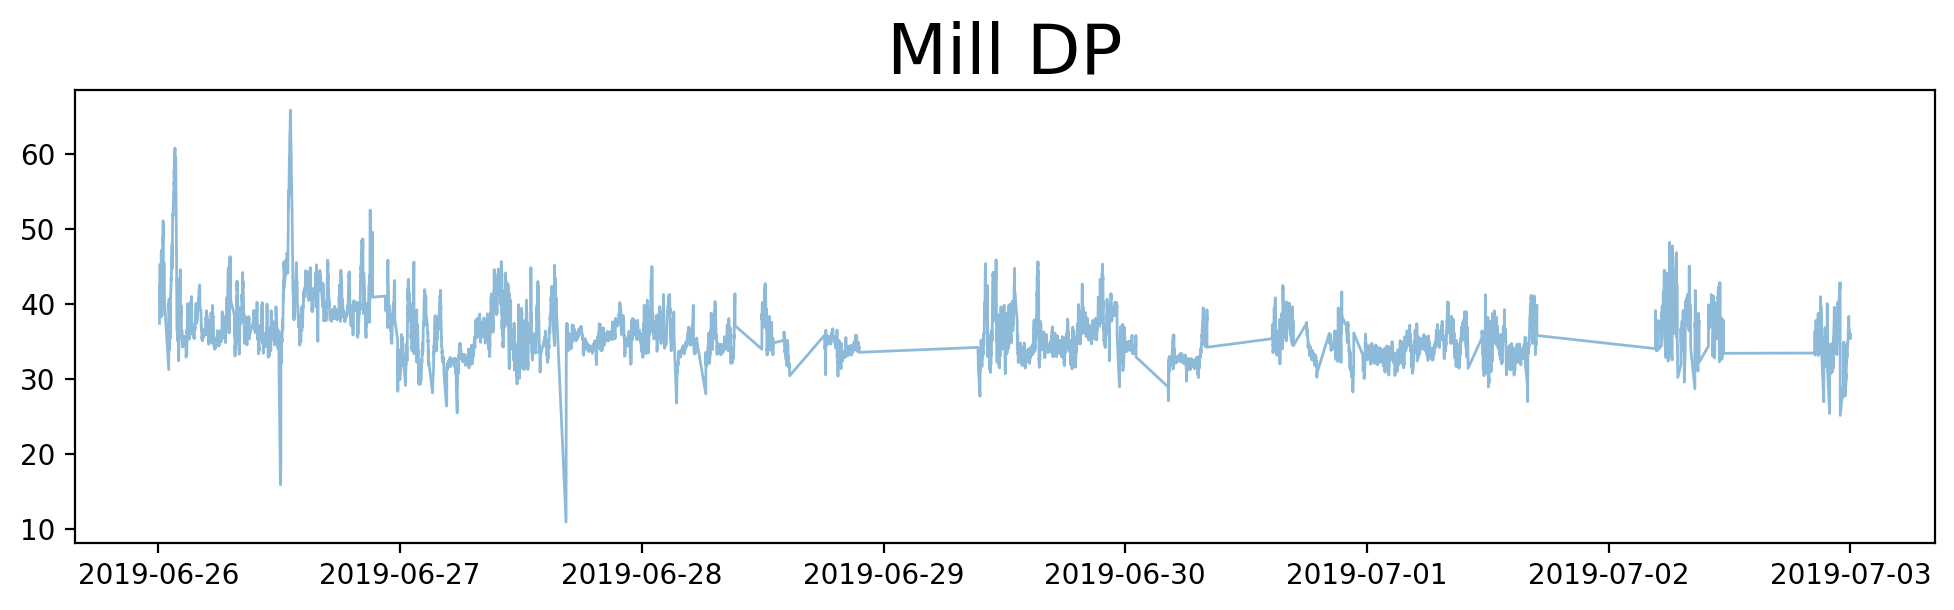

In [ ]:
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

fig, ax = plt.subplots(figsize = (12, 3), dpi=200)

#create the plot
ax.plot(data['2019-06-26':'2019-07-02'].index, data['mill_dp_mbar_pv']['2019-06-26':'2019-07-02'], lw = 1, alpha = 0.5)

#custumize plots
ax.set_title("Mill DP", size = 25)

ax.xaxis.set_major_locator(mdates.DayLocator(interval = 1))
# Format x-tick labels as the full year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

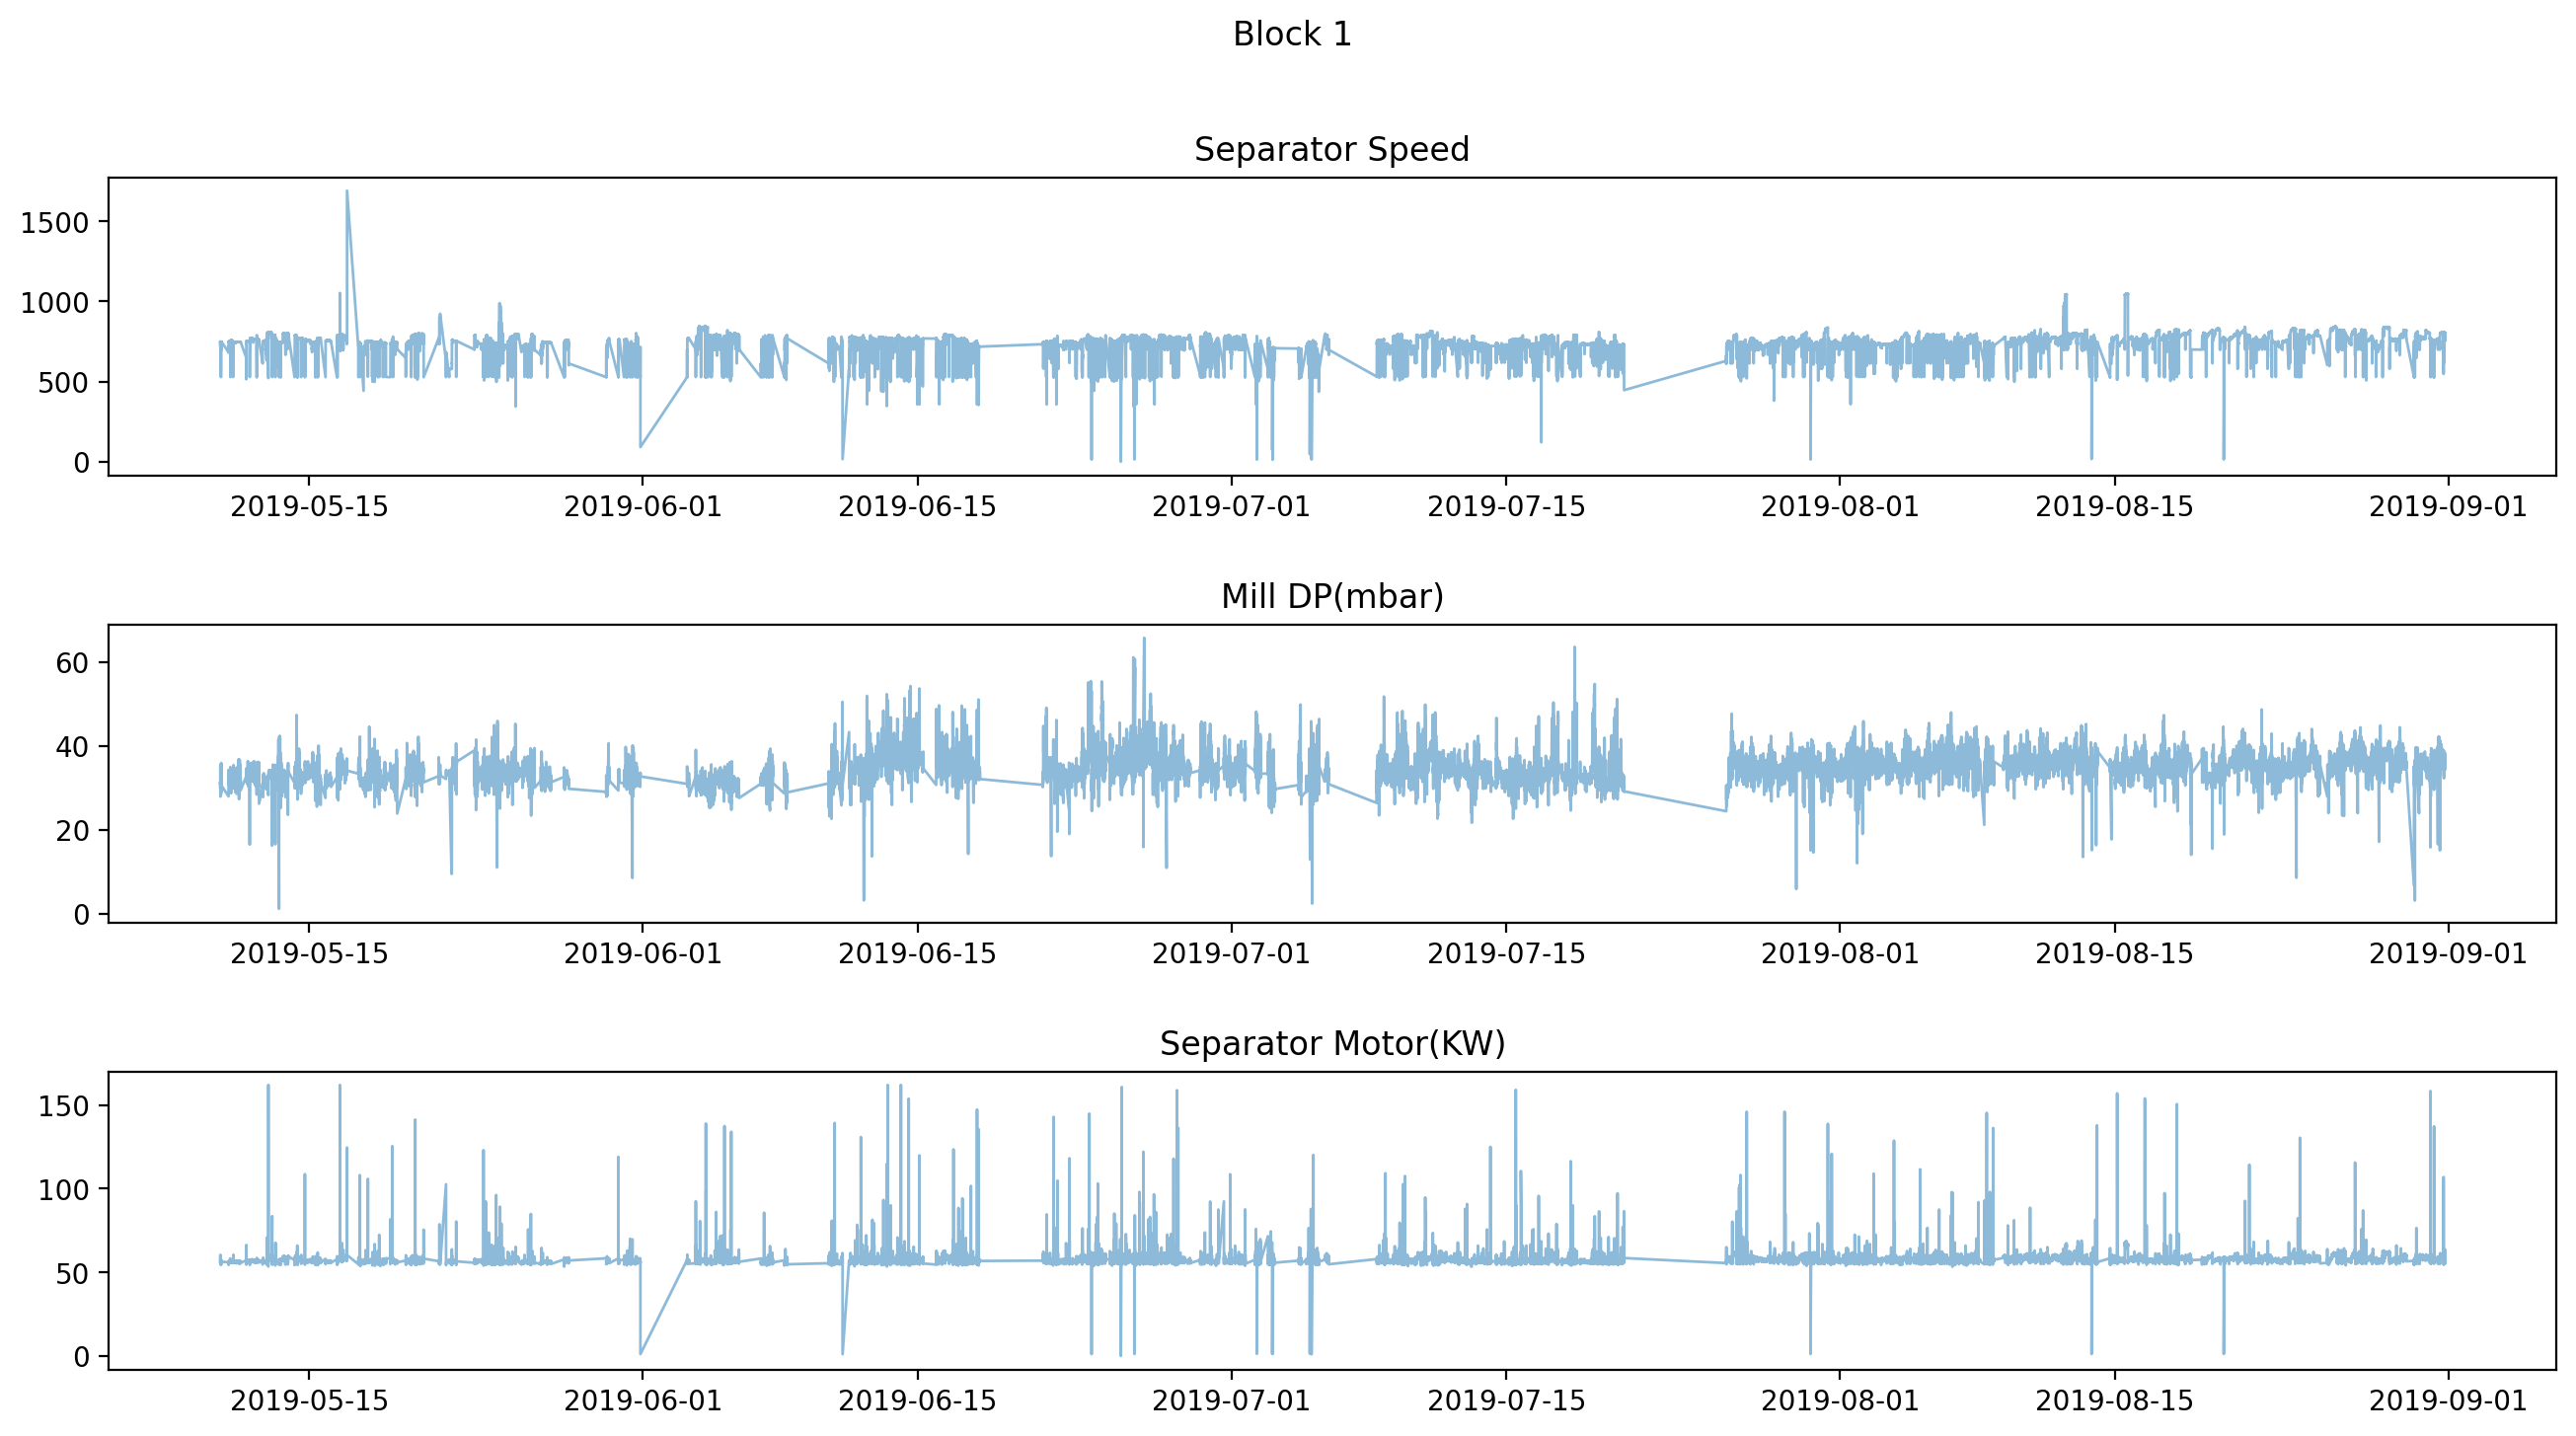

In [ ]:
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
fig, axs = plt.subplots(nrows=3,figsize = (16, 8), dpi=200)

fig.suptitle('Block 1')
axs[0].plot(data.index, data['separator_speed_rpm_pv'], lw = 1, alpha = 0.5)
axs[0].set_title('Separator Speed')
axs[1].plot(data.index, data['mill_dp_mbar_pv'], lw = 1, alpha = 0.5)
axs[1].set_title('Mill DP(mbar)')
axs[2].plot(data.index, data['separator_pwr_kw_pv'], lw = 1, alpha = 0.5)
axs[2].set_title('Separator Motor(KW)')

fig.subplots_adjust(hspace=0.5)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))


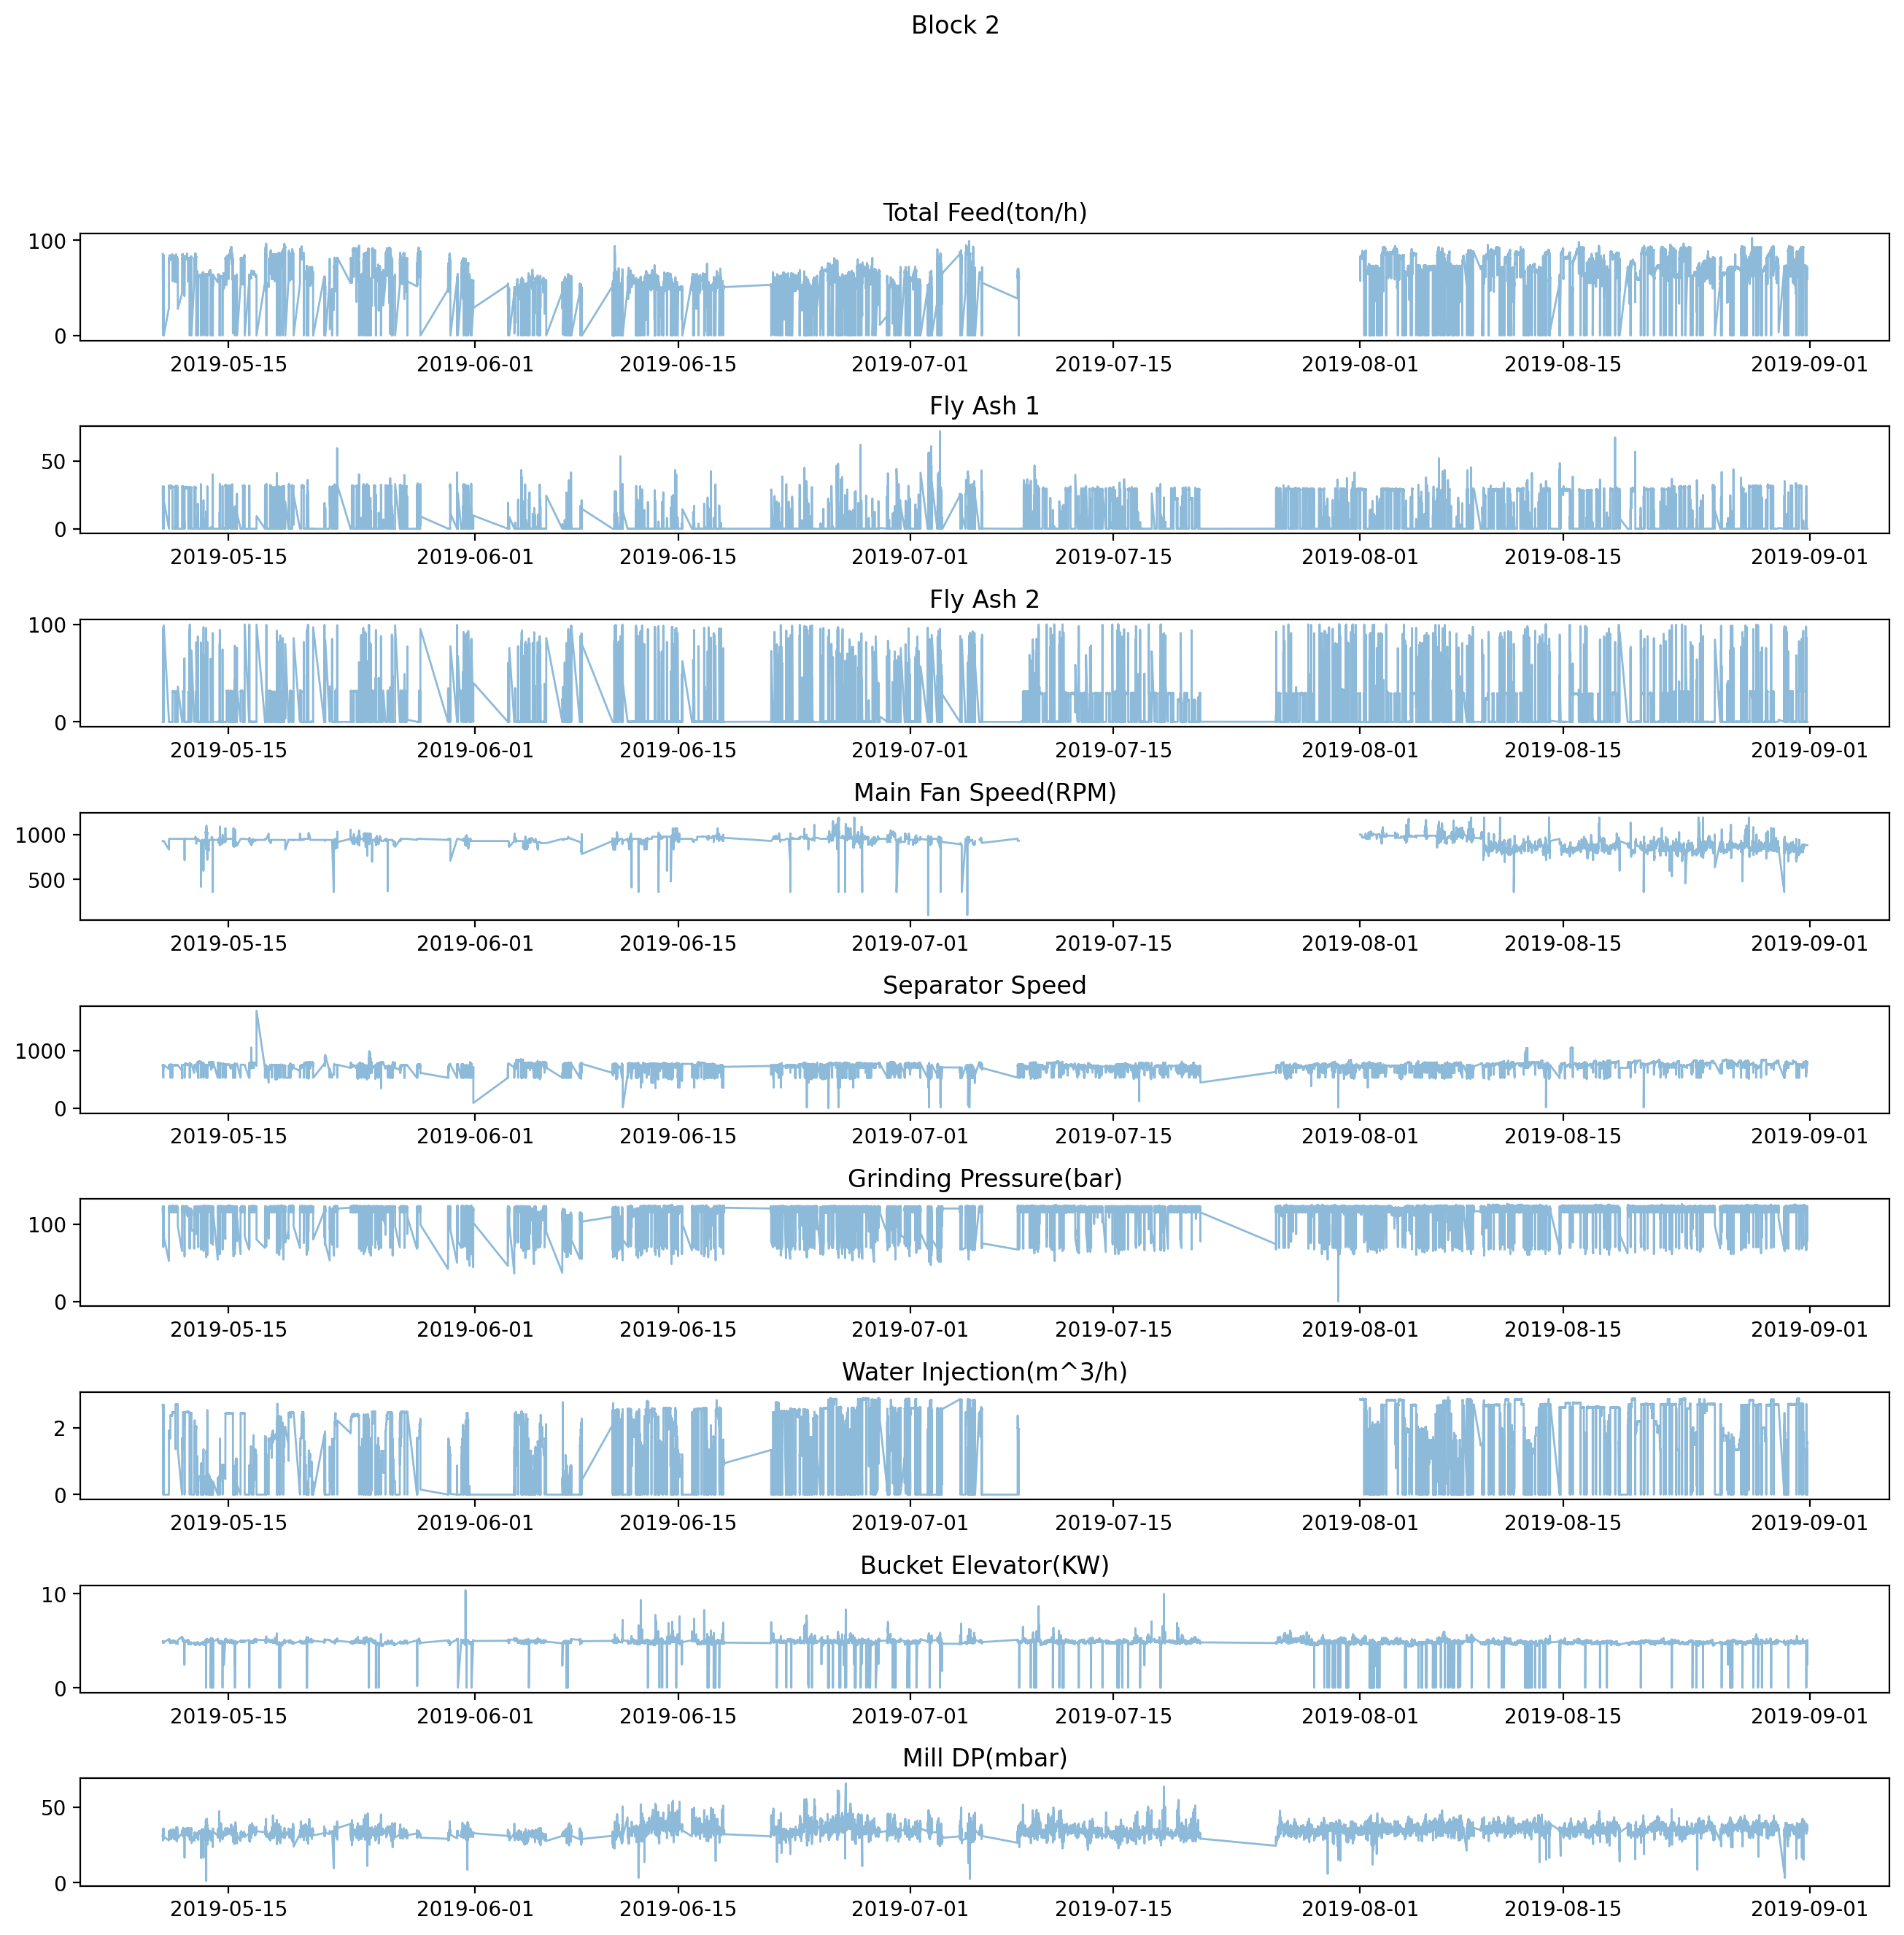

In [ ]:
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
fig, axs = plt.subplots(nrows=9,figsize = (16, 15), dpi=200)

fig.suptitle('Block 2')
axs[0].plot(data.index, data['total_feed_ton/h_pv'], lw = 1, alpha = 0.5)
axs[0].set_title('Total Feed(ton/h)')
axs[1].plot(data.index, data['fly_ash_1_perc_pv'], lw = 1, alpha = 0.5)
axs[1].set_title('Fly Ash 1')
axs[2].plot(data.index, data['fly_ash_2_perc_pv'], lw = 1, alpha = 0.5)
axs[2].set_title('Fly Ash 2')
axs[3].plot(data.index, data['main_fan_speed_rpm_pv'], lw = 1, alpha = 0.5)
axs[3].set_title('Main Fan Speed(RPM)')
axs[4].plot(data.index, data['separator_speed_rpm_pv'], lw = 1, alpha = 0.5)
axs[4].set_title('Separator Speed')
axs[5].plot(data.index, data['grinding_pressure_bar_pv'], lw = 1, alpha = 0.5)
axs[5].set_title('Grinding Pressure(bar)')
axs[6].plot(data.index, data['mill_injection_water_m3/h_pv'], lw = 1, alpha = 0.5)
axs[6].set_title('Water Injection(m^3/h)')
axs[7].plot(data.index, data['bucket_elv_mtr_pwr_kw_pv'], lw = 1, alpha = 0.5)
axs[7].set_title('Bucket Elevator(KW)')
axs[8].plot(data.index, data['mill_dp_mbar_pv'], lw = 1, alpha = 0.5)
axs[8].set_title('Mill DP(mbar)')

fig.subplots_adjust(hspace=0.8)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))

# Making dataframes for each block

In [ ]:
#spliting the data depending on each block
block1 = ['separator_pwr_kw_pv','separator_speed_rpm_pv','mill_dp_mbar_pv']
block2 =  ['total_feed_ton/h_pv', 'fly_ash_1_perc_pv', 'fly_ash_2_perc_pv', 'main_fan_speed_rpm_pv', 
         'separator_speed_rpm_pv', 'grinding_pressure_bar_pv','mill_injection_water_m3/h_pv', 'bucket_elv_mtr_pwr_kw_pv', 
         'mill_dp_mbar_pv']

df_b1 = df[block1]
df_b2 = df[block2]


# Correlations



> Block1



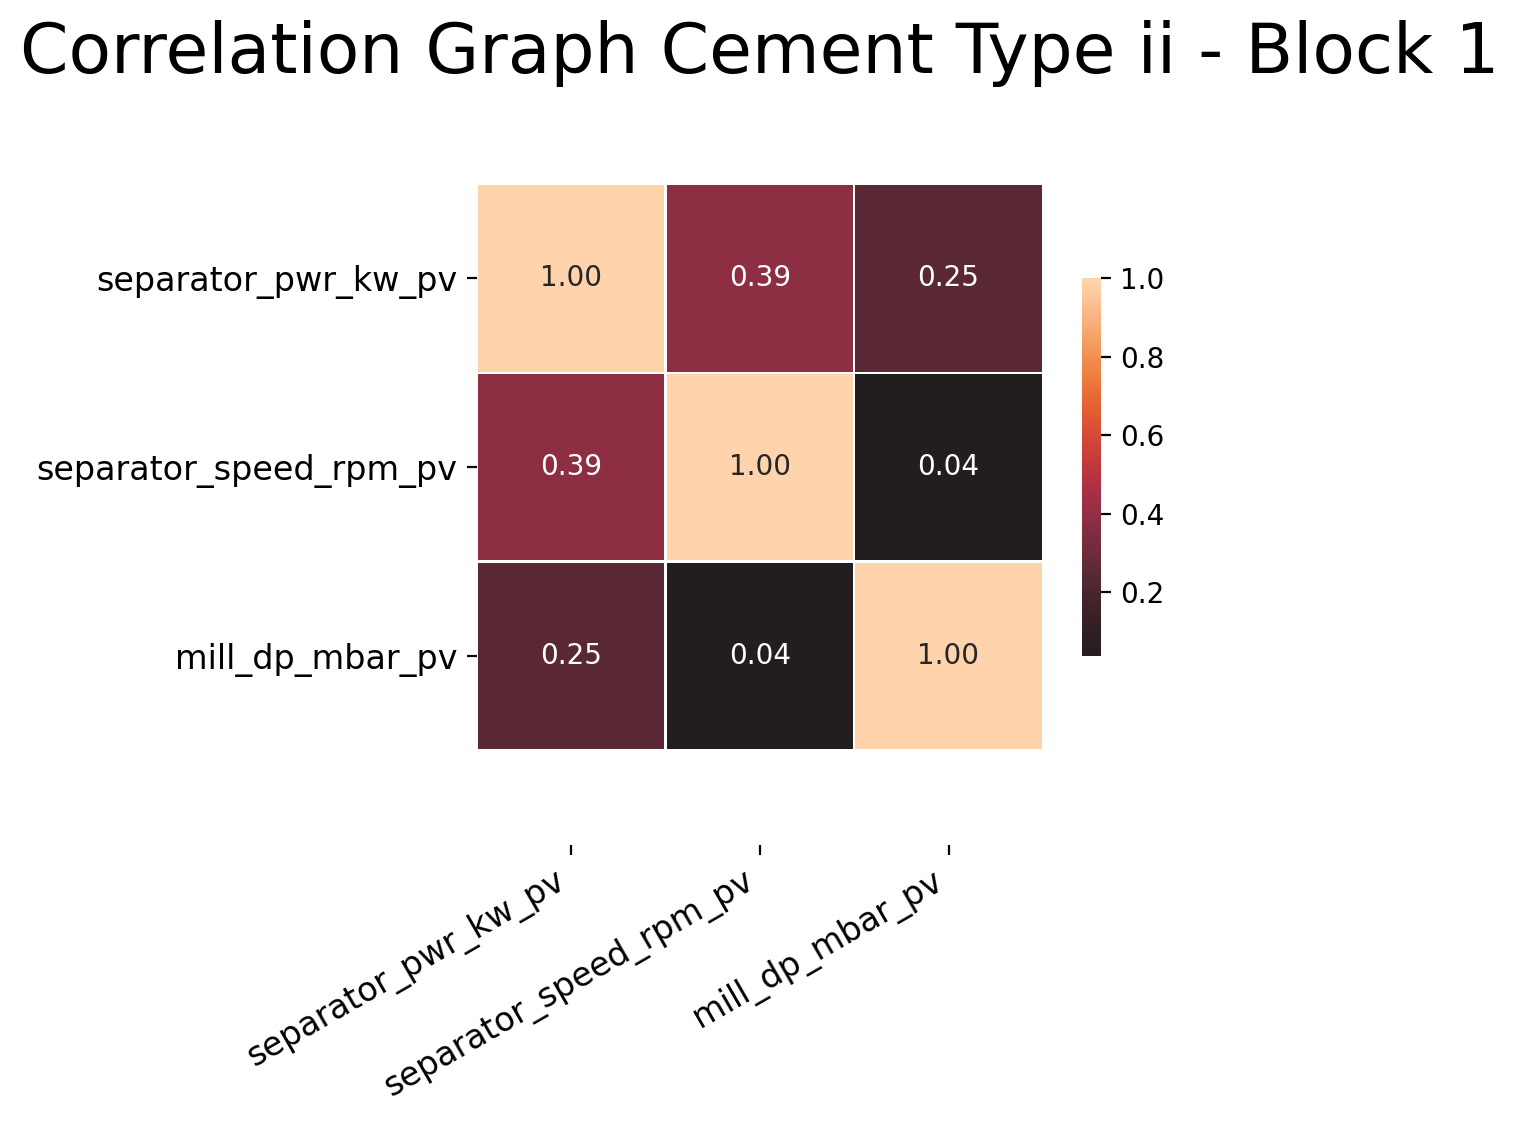

In [ ]:
#correlation matrix for cement type ii for block1
corr_b1 = df_b1.corr()

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
sns.heatmap(corr_c1_b1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')
plt.title('Correlation Graph - Block 1', size = 25)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.tick_params(labelsize=12)



>Block 2 



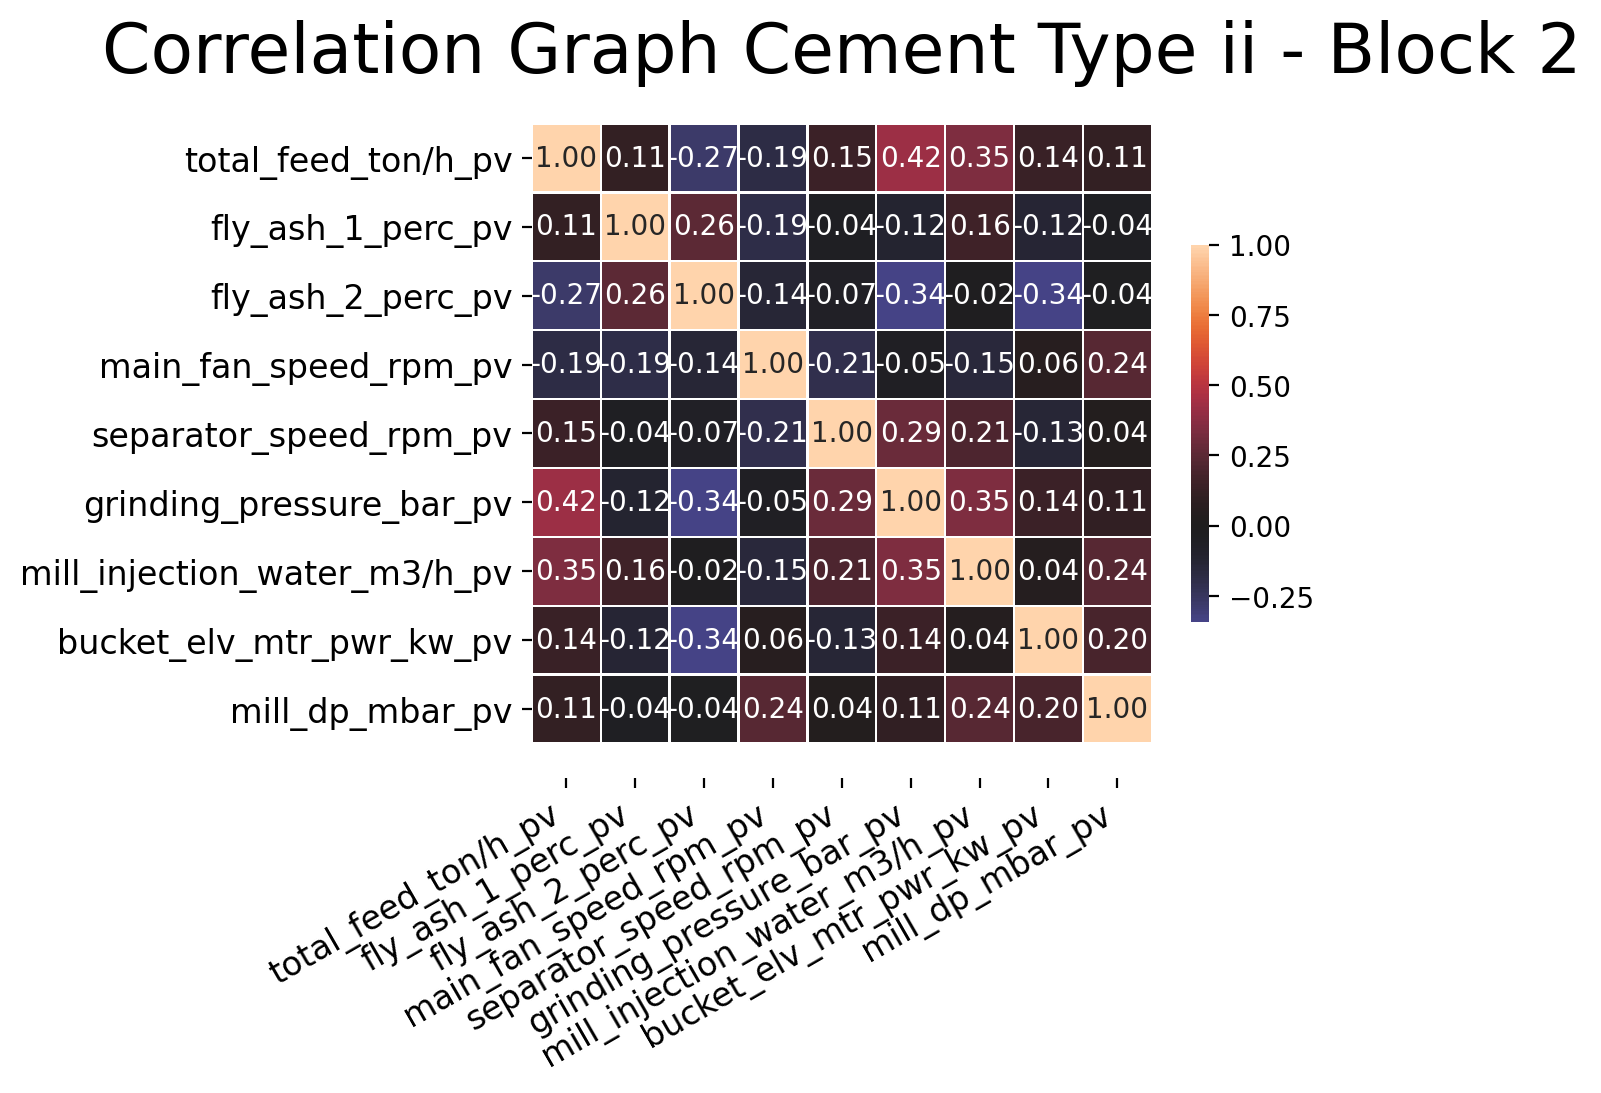

In [ ]:
#correlation matrix for cement type ii for block2
corr_b2 = df_b2.corr()

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
sns.heatmap(corr_c1_b2, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')
plt.title('Correlation Graph - Block 2', size = 25)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.tick_params(labelsize=12)